# See how good predictions just based on mean perform

For a given mean, predict avg. value of all other points with that same mean

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.neighbors import KNeighborsRegressor

In [3]:
DIRECTORY = './data/'
train = pd.read_csv(DIRECTORY + 'train.csv').drop(columns='id')
test = pd.read_csv(DIRECTORY + 'test.csv').drop(columns='id')

<ErrorbarContainer object of 3 artists>

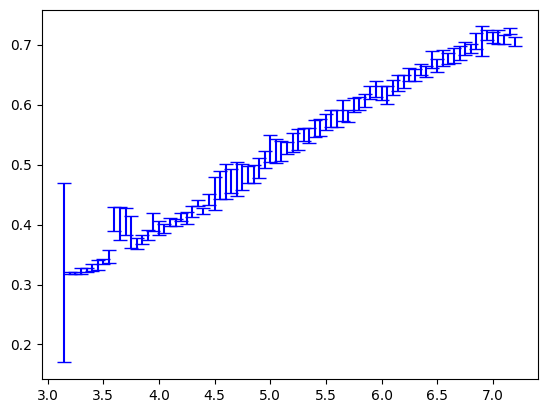

In [17]:
train['mean'] = train.drop(columns='FloodProbability').mean(axis=1)
grouped = train.groupby(by='mean')['FloodProbability'].agg(['mean', 'count', 'std', 'sum'])

# Add custom error bars using Matplotlib
plt.errorbar(grouped.index, grouped['mean'], yerr=grouped['std'].fillna(0.15), fmt='none', color='blue', capsize=5)

Now, try predicting mean Flood Probability of those with the same mean X as self

In [34]:
prediction_df = train.set_index('mean')[['FloodProbability']].join(grouped)
prediction_df['count_m1'] = prediction_df['count'] - 1
prediction_df['prediction'] = (prediction_df['sum'] - prediction_df['FloodProbability'])/prediction_df['count_m1']
prediction_df['prediction'] = np.where(prediction_df['prediction'].isna(), prediction_df.index * 0.1, prediction_df['prediction'])

In [42]:
r2_score(prediction_df['FloodProbability'], prediction_df['prediction']) # no data leakage
# r2_score(prediction_df['FloodProbability'], prediction_df['mean']) # data leakage

0.8657855985341035